In [2]:
import matplotlib.pyplot as plt
import numpy as np

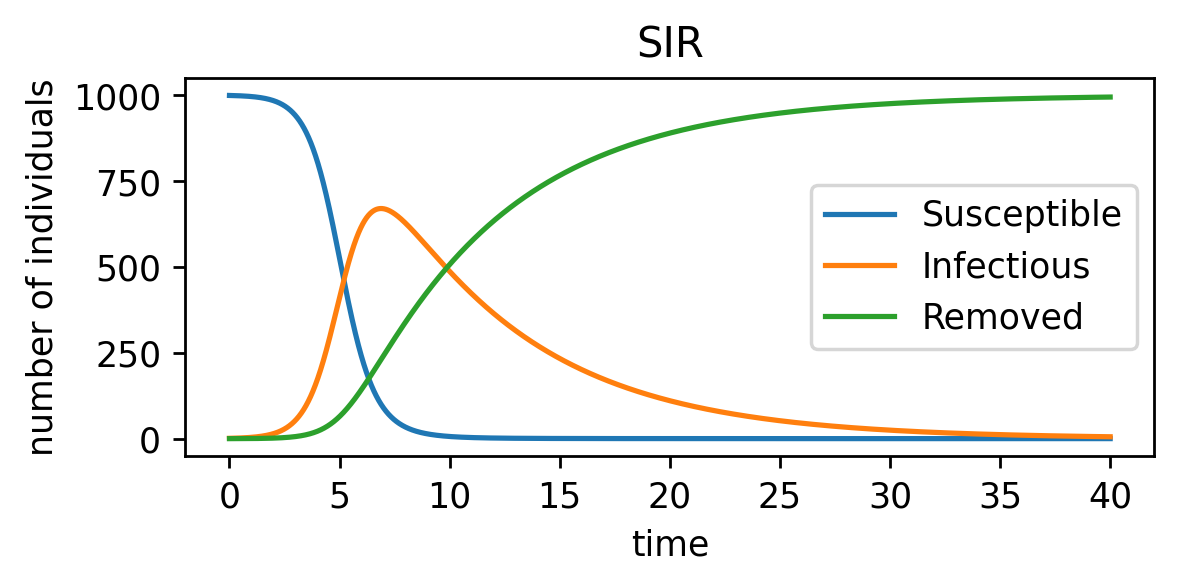

In [4]:
class SIR:
    def __init__(self, S0=1000, I0=1, R0=0, beta=2, gamma=0.2, time=100, step=0.1):
        self.t = [0]
        self.S = [S0]
        self.I = [I0]
        self.R = [R0]
        self.N = S0 + I0 + R0
        self.beta = beta
        self.gamma = gamma
        self.time = time
        self.step = step

    dSdt = lambda self,S,I,R,N,beta,gamma: - beta * (S / N) * I
    dIdt = lambda self,S,I,R,N,beta,gamma: + beta * (S / N) * I - gamma * I
    dRdt = lambda self,S,I,R,N,beta,gamma: + gamma * I


    def euler(self, dydx, S, I, R, N, beta, gamma, step) -> float:
        return dydx(S, I, R, N, beta, gamma) * step

    def rk4(self, dydx, S, I, R, N, beta, gamma, step) -> float:
        k1 = dydx(S, I, R, N, beta, gamma)
        k2 = dydx(S + step/2*k1, I + step/2*k1, R + step/2*k1, N, beta, gamma)
        k3 = dydx(S + step/2*k2, I + step/2*k2, R + step/2*k2, N, beta, gamma)
        k4 = dydx(S + step*k3, I + step*k3, R + step*k3, N, beta, gamma)
        return step/6*(k1 + 2*k2 + 2*k3 + k4)

    def rk45(self, dydx, S, I, R, N, beta, gamma, step) -> float:
        k1 = dydx(S, I, R, N, beta, gamma)
        k2 = dydx(S + step/4*k1, I + step/4*k1, R + step/4*k1, N, beta, gamma)
        k3 = dydx(S + step/4*k2, I + step/4*k2, R + step/4*k2, N, beta, gamma)
        k4 = dydx(S + step/2*k3, I + step/2*k3, R + step/2*k3, N, beta, gamma)
        k5 = dydx(S + step/2*k4, I + step/2*k4, R + step/2*k4, N, beta, gamma)
        k6 = dydx(S + step*k5, I + step*k5, R + step*k5, N, beta, gamma)
        return (step/6)*(k1 + 2*k2 + 2*k3 + 2*k4 + k5 + k6)

    def solve(self, algorithm='rk4'):
        time = 0
        step = self.step
        S, I, R = self.S[0], self.I[0], self.R[0]
        dSdt, dIdt, dRdt = self.dSdt, self.dIdt, self.dRdt
        algorithm = self.rk45 if algorithm == 'rk45' else self.rk4 if algorithm == 'rk4' else self.euler
        N = self.N
        beta, gamma = self.beta, self.gamma

        while time < self.time:
            S += algorithm(dSdt, S, I, R, N, beta, gamma, step)
            I += algorithm(dIdt, S, I, R, N, beta, gamma, step)
            R += algorithm(dRdt, S, I, R, N, beta, gamma, step)
            self.S.append(S)
            self.I.append(I)
            self.R.append(R)
            time += step
            self.t.append(time)
        return self.S, self.I, self.R


    def show(self):
        fig, (ax1) = plt.subplots(1, 1, figsize=(5, 2), dpi=250)
        plt.title('SIR')
        ax1.set_xlabel('time')
        ax1.set_ylabel('number of individuals')

        t = self.t

        ax1.plot(t,self.S, label='Susceptible')
        ax1.plot(t,self.I, label='Infectious')
        ax1.plot(t,self.R, label='Removed')
        ax1.legend(loc='best')
        plt.show()

sir = SIR(S0=999, I0=1, R0=0, beta=1, gamma=1/10, time=40, step=.001)
sir.solve('rk45')
sir.show()

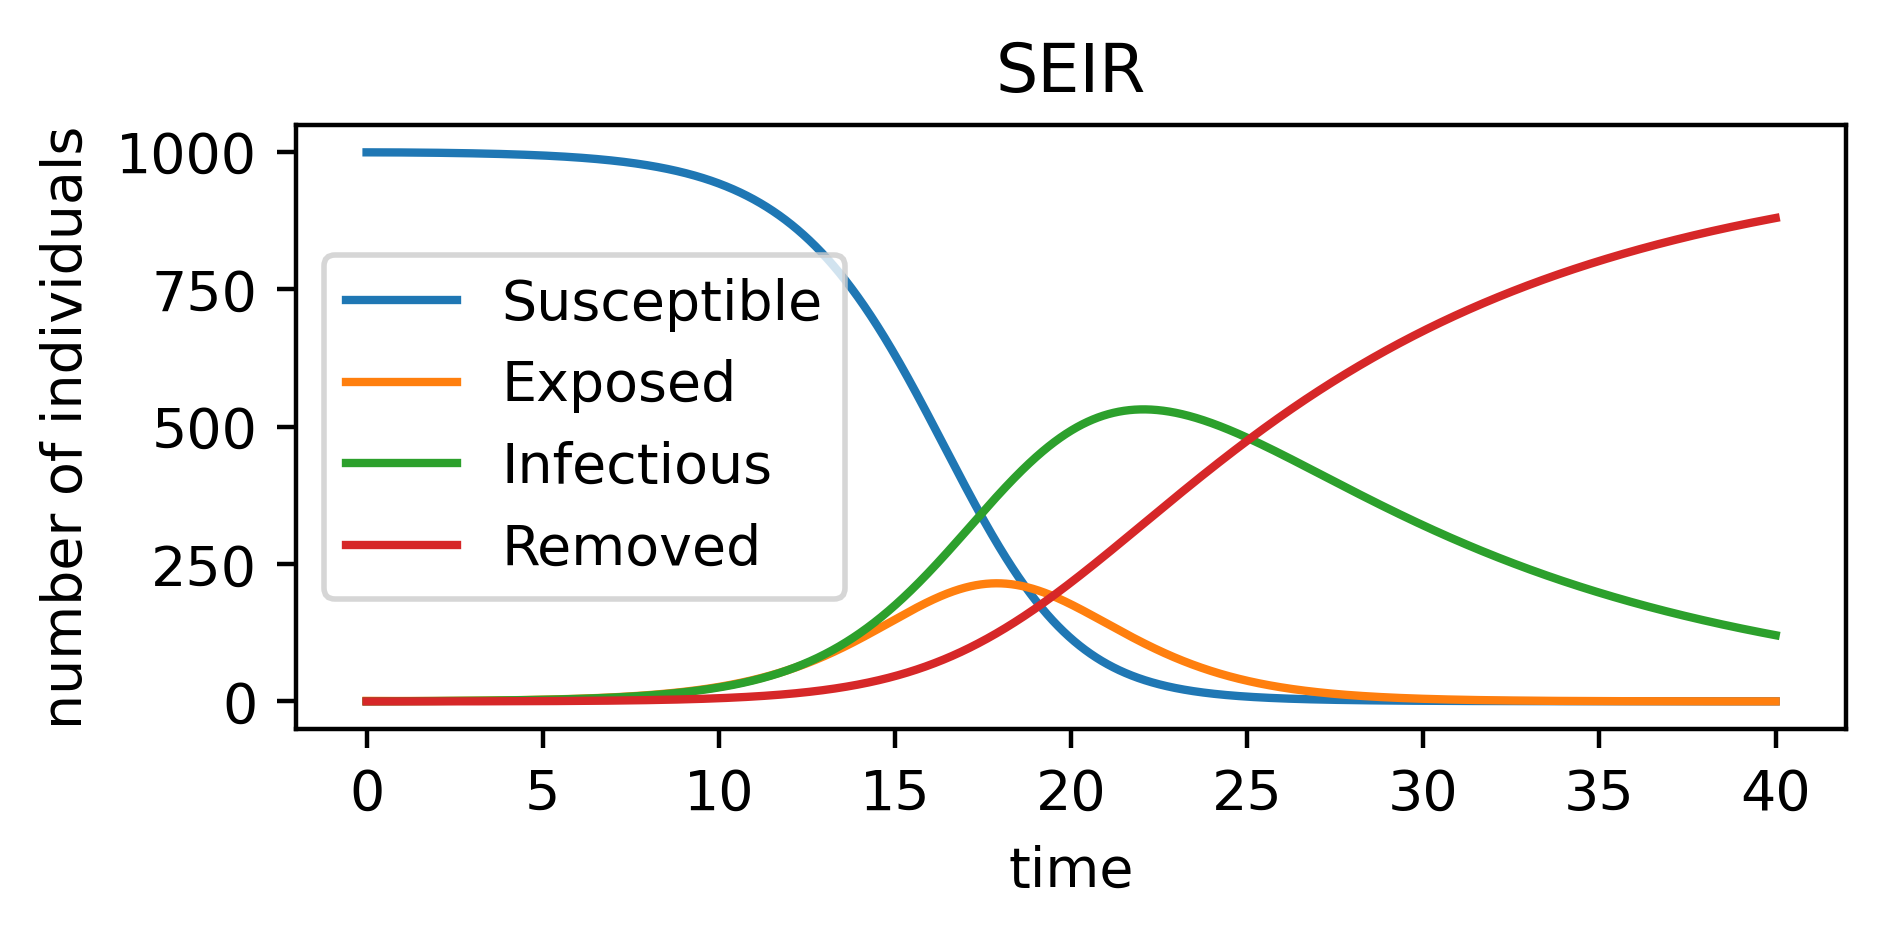

In [5]:
class SEIR:
    def __init__(self, S0=1000, E0=0, I0=1, R0=0, beta=2, delta=0.5, gamma=0.2, time=100, step=0.1):
        self.t = [0]
        self.S = [S0]
        self.E = [E0]
        self.I = [I0]
        self.R = [R0]
        self.N = S0 + E0 + I0 + R0
        self.beta = beta
        self.delta = delta
        self.gamma = gamma
        self.time = time
        self.step = step

    dSdt = lambda self,S,E,I,R,N,beta,delta,gamma: - (beta * I / N * S)
    dEdt = lambda self,S,E,I,R,N,beta,delta,gamma: + (beta * I / N * S) - (delta * E)
    dIdt = lambda self,S,E,I,R,N,beta,delta,gamma: + (delta * E) - (gamma * I)
    dRdt = lambda self,S,E,I,R,N,beta,delta,gamma: + (gamma * I)


    def euler(self, dydx, S, E, I, R, N, beta, delta, gamma, step) -> float:
        return dydx(S, E, I, R, N, beta, delta, gamma) * step

    def rk4(self, dydx, S, E, I, R, N, beta, delta, gamma, step) -> float:
        k1 = dydx(S, E, I, R, N, beta, delta, gamma)
        k2 = dydx(S + step/2*k1,    E + step/2*k1,  I + step/2*k1,  R + step/2*k1,  N, beta, delta, gamma)
        k3 = dydx(S + step/2*k2,    E + step/2*k2,  I + step/2*k2,  R + step/2*k2,  N, beta, delta, gamma)
        k4 = dydx(S + step*k3,      E + step*k3,    I + step*k3,    R + step*k3,    N, beta, delta, gamma)
        return step/6*(k1 + 2*k2 + 2*k3 + k4)

    def solve(self, algorithm='rk4'):
        time = 0
        step = self.step
        S, E, I, R = self.S[0], self.E[0], self.I[0], self.R[0]
        dSdt, dEdt, dIdt, dRdt = self.dSdt, self.dEdt, self.dIdt, self.dRdt
        algorithm = self.rk4 if algorithm == 'rk4' else self.euler
        N = self.N
        beta, delta, gamma = self.beta, self.delta, self.gamma

        while time < self.time:
            S += algorithm(dSdt, S, E, I, R, N, beta, delta, gamma, step)
            E += algorithm(dEdt, S, E, I, R, N, beta, delta, gamma, step)
            I += algorithm(dIdt, S, E, I, R, N, beta, delta, gamma, step)
            R += algorithm(dRdt, S, E, I, R, N, beta, delta, gamma, step)
            self.S.append(S)
            self.E.append(E)
            self.I.append(I)
            self.R.append(R)
            time += step
            self.t.append(time)
        return self.S, self.E, self.I, self.R


    def show(self):
        fig, (ax1) = plt.subplots(1, 1, figsize=(5, 2), dpi=400)
        plt.title('SEIR')
        ax1.set_xlabel('time')
        ax1.set_ylabel('number of individuals')

        t = self.t

        ax1.plot(t,self.S, label='Susceptible')
        ax1.plot(t,self.E, label='Exposed')
        ax1.plot(t,self.I, label='Infectious')
        ax1.plot(t,self.R, label='Removed')
        ax1.legend(loc='best')
        plt.show()
        # plt.savefig('./../paper/figures/seir.pdf')

seir = SEIR(S0=999, E0=1, I0=0, R0=0, beta=1, delta=1/2, gamma=1/10, time=40, step=.001)
seir.solve('rk4')
seir.show()